In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split

import warnings
# ignorar warnings
warnings.filterwarnings('ignore')

## Dados
> Breast Cancer Wisconsin [https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv]

In [2]:
# leitura de data set [diagnostico sobre cancer de mama]
data = pd.read_csv("data.csv")

# print
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# transformando a coluna 'diagnosis' para integer [Maligno = 1 e Benigno = 0]
data["diagnosis"] = data["diagnosis"].apply(lambda x: 1 if x == "M" else 0)

# eliminar a coluna "id" e "Unnamed: 32" pois é uma coluna em branco
if set(["id"]).issubset(set(data.columns)):
  data.drop(["id"], axis=1,inplace=True)
  print("""drop: ["id", "Unnamed: 32"]""")

if set(["Unnamed: 32"]).issubset(set(data.columns)):
  data.drop(["Unnamed: 32"], axis=1,inplace=True)
  print("""drop: ["id", "Unnamed: 32"]""")

data.info()

drop: ["id", "Unnamed: 32"]
drop: ["id", "Unnamed: 32"]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se            

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


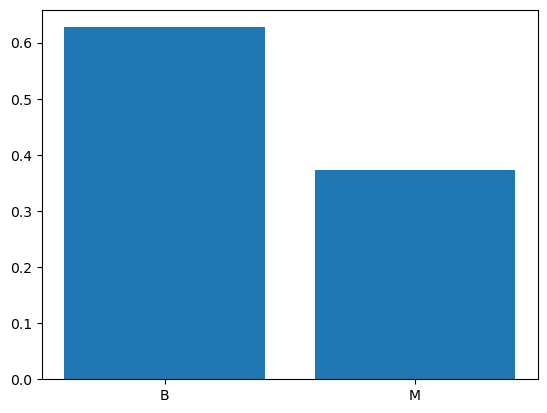

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


In [4]:
# Balanceamento de classes
plt.bar(x=data['diagnosis'].value_counts(normalize=True).index,
        height=data['diagnosis'].value_counts(normalize=True).values)
plt.xticks(ticks=[0, 1], labels=['B', 'M']) # nomeia os eixos
plt.show()
print(data['diagnosis'].value_counts(normalize=True))

In [5]:
# No dataset possui um média (mean), erro padrão (se) e pior medida (worst) para cada feature associado a diagnostico.
# Como considerar somente a média pode trazer viés, precisamos de um tratamento para mitigar esse viés.
# Para isso, assumimos que cada feature possui distribuição gaussiana e vamos tentar criar novas observações com 99% IC
# fazendo (mean + 1.99 * se) e (mean - 1.99 * se)
col_mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

col_se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
          'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se']

col_worst = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
             'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

col_novo = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 
            'compactness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension']

In [6]:
# determinar z Score de uma distribuição normal
import scipy.stats as st

z_score = st.norm.ppf(.975)
z_score

1.959963984540054

In [7]:
cancer = data[list(['diagnosis', *col_mean])].copy()
cancer.columns = ['diagnosis', *col_novo]

cancer_aux = data[list(['diagnosis', *col_se])].copy()
cancer_aux.columns = ['diagnosis', *col_novo]

cancer_up = cancer[col_novo].add(cancer_aux[col_novo] * z_score)
cancer_up['diagnosis'] = cancer['diagnosis'].copy()

cancer_down = cancer[col_novo].add(cancer_aux[col_novo] * -z_score)
cancer_down['diagnosis'] = cancer['diagnosis'].copy()

cancer_worst = data[list(['diagnosis', *col_worst])].copy()
cancer_worst.columns = ['diagnosis', *col_novo]


In [8]:
cancer_diagnosis = pd.concat([cancer, cancer_up, cancer_down, cancer_worst])

In [9]:
cancer_diagnosis.describe()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
count,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000
mean,0.372583,14.662766,20.886542,95.792078,711.312610,0.105362,0.141822,0.134647,0.065341,0.208390,0.068085
std,0.483599,4.056822,5.862610,28.136256,436.286977,0.025181,0.119785,0.160119,0.057934,0.068452,0.015614
min,0.000000,6.541772,8.005495,40.746176,124.227674,0.038540,-0.053075,-0.365346,-0.024896,0.067016,0.027115
25%,0.000000,11.897642,16.668708,76.753894,435.200000,0.087191,0.063148,0.025558,0.021018,0.158675,0.057697
50%,0.000000,13.665000,20.101596,88.520000,572.585527,0.101608,0.106884,0.084150,0.051803,0.194703,0.064104
75%,1.000000,16.539125,24.391938,109.322444,840.800729,0.120818,0.182474,0.190041,0.094543,0.245908,0.074326
max,1.000000,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
print(cancer_diagnosis.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2276 entries, 0 to 568
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          2276 non-null   int64  
 1   radius             2276 non-null   float64
 2   texture            2276 non-null   float64
 3   perimeter          2276 non-null   float64
 4   area               2276 non-null   float64
 5   smoothness         2276 non-null   float64
 6   compactness        2276 non-null   float64
 7   concavity          2276 non-null   float64
 8   concave points     2276 non-null   float64
 9   symmetry           2276 non-null   float64
 10  fractal_dimension  2276 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 213.4 KB
None


## Verificar balanceamento
> Considerei que está pouco desbalanceado. Por isso, não apliquei nenhuma medida para corrigir (nem oversampling, name undersampling)

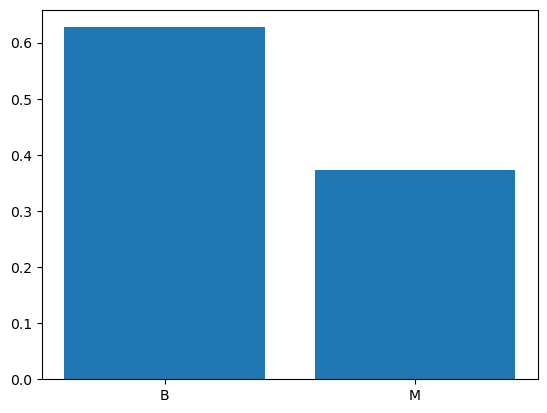

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


In [11]:
# Balanceamento de classes apos criar mais observações
plt.bar(x=cancer_diagnosis['diagnosis'].value_counts(normalize=True).index,
        height=cancer_diagnosis['diagnosis'].value_counts(normalize=True).values)
plt.xticks(ticks=[0, 1], labels=['B', 'M']) # nomeia os eixos
plt.show()
print(cancer_diagnosis['diagnosis'].value_counts(normalize=True))

## Analise Exploratoria

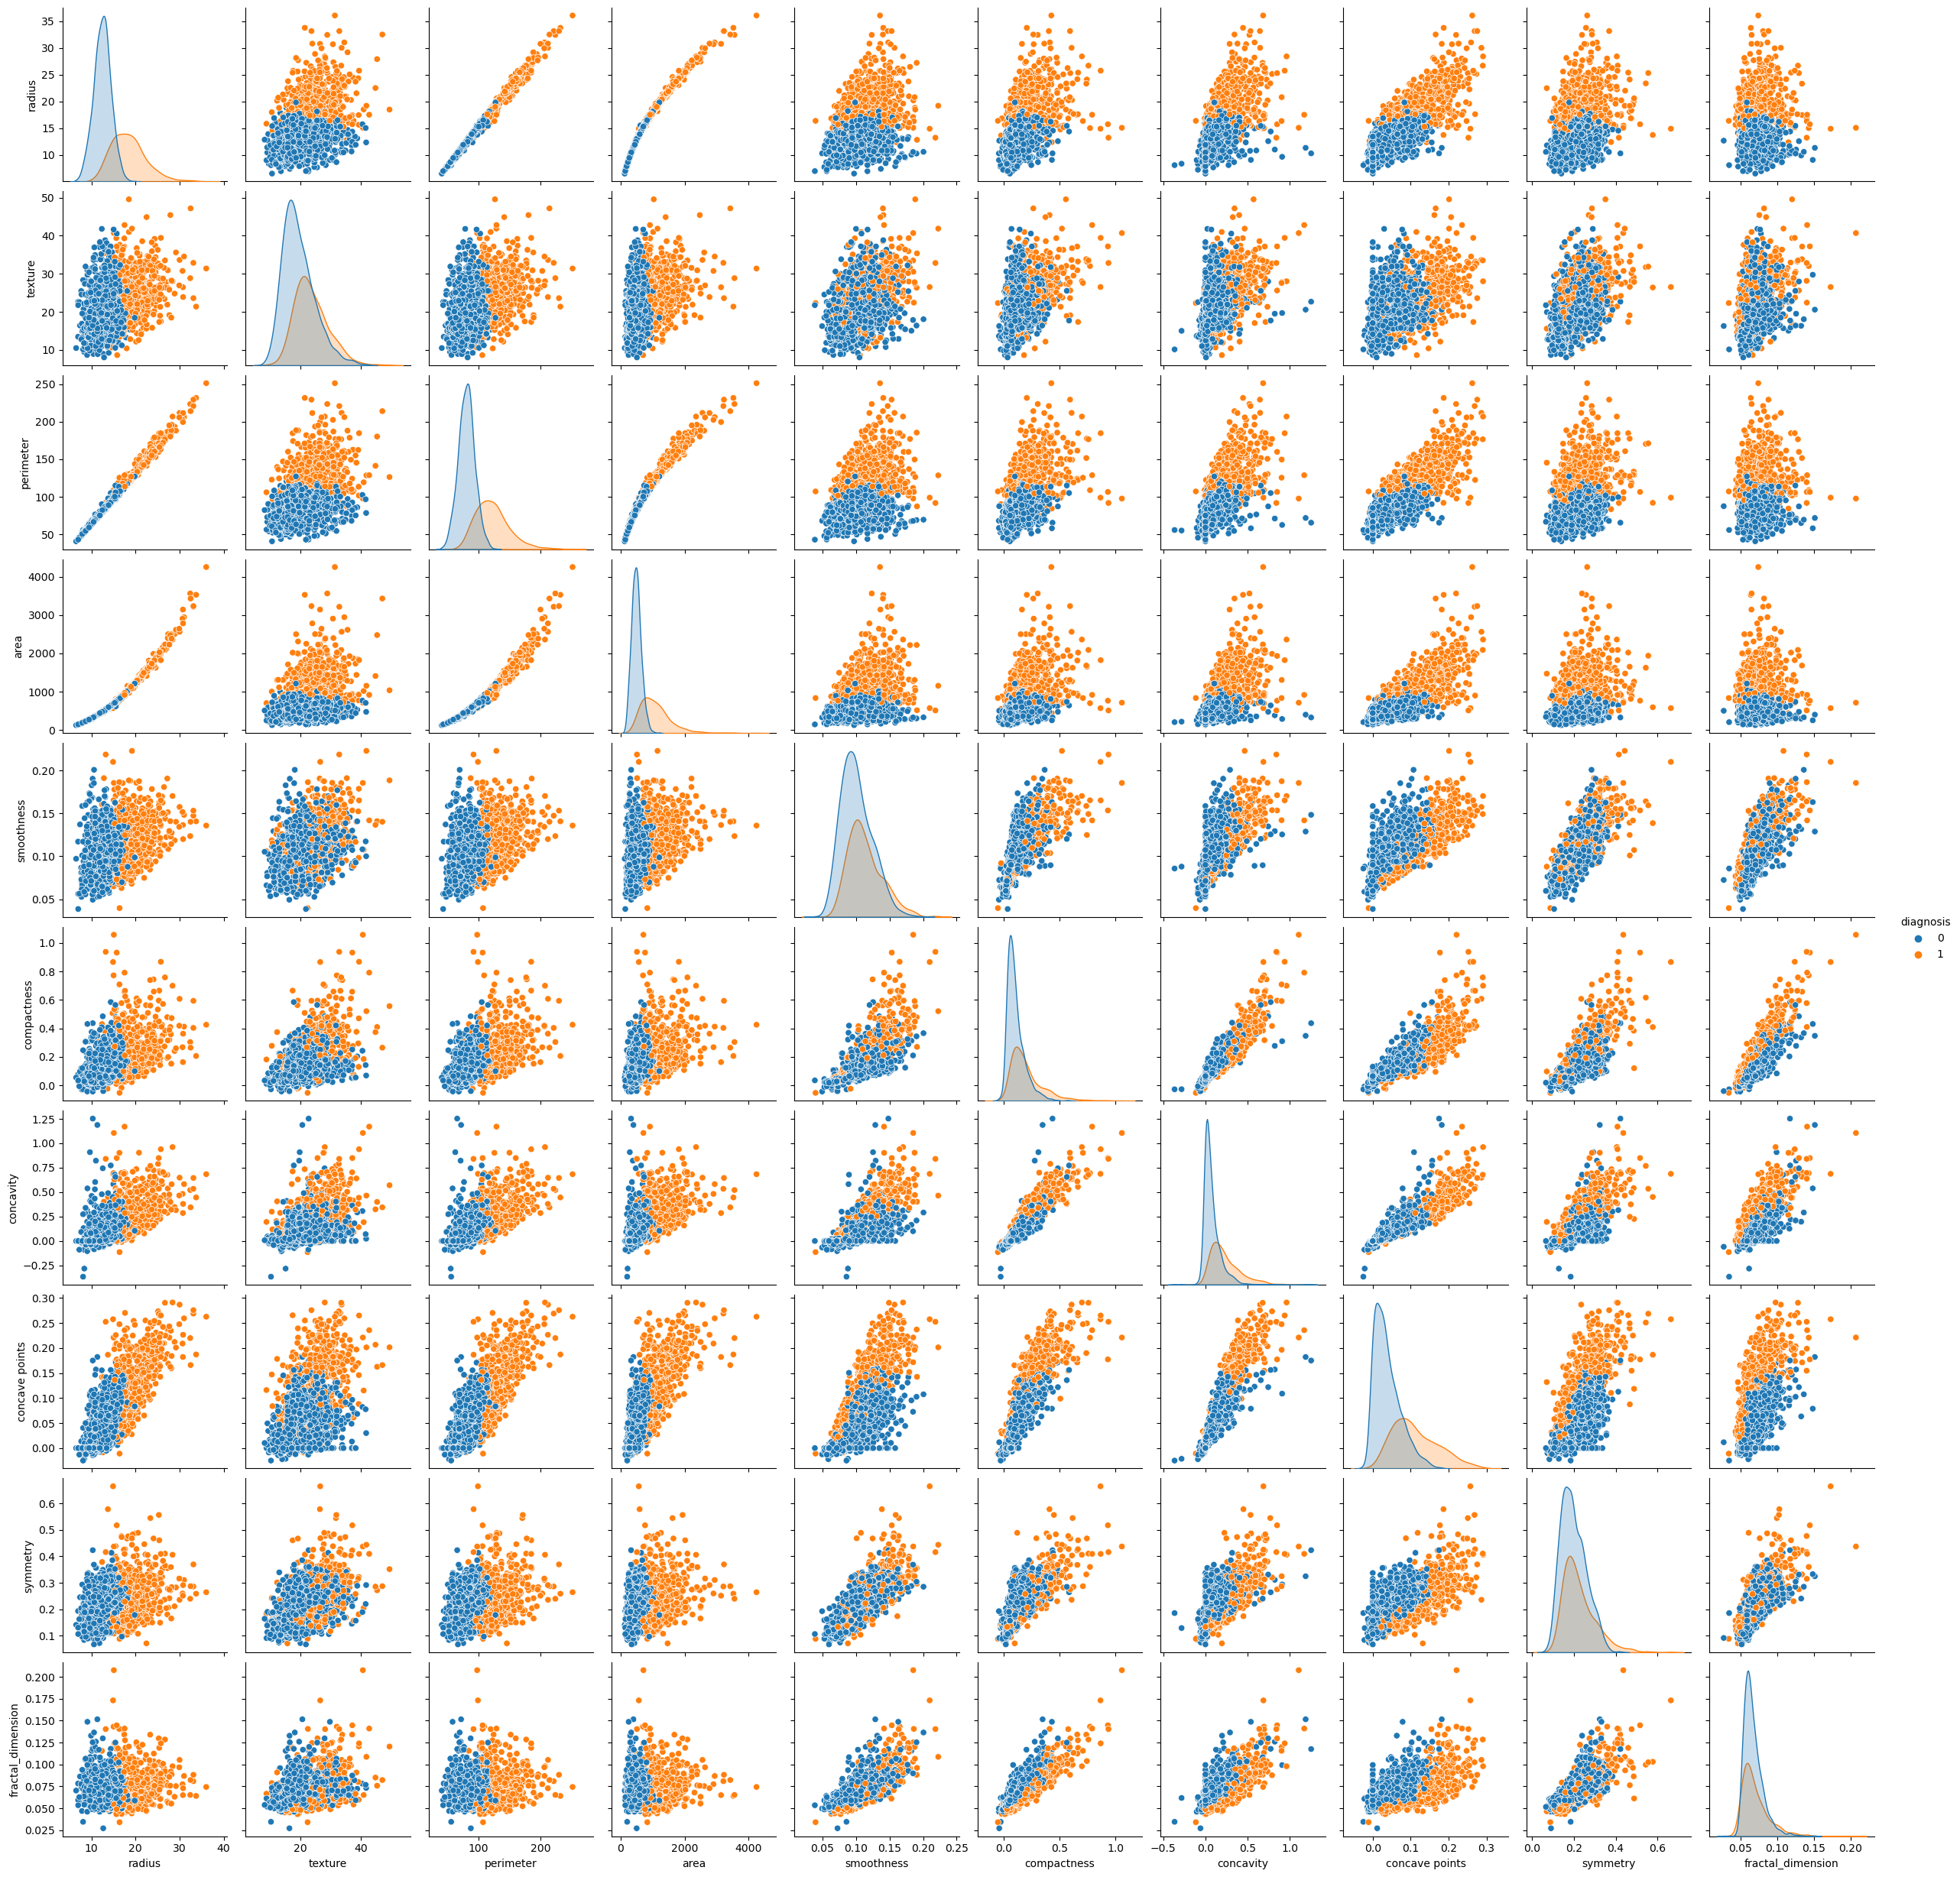

In [12]:
sns.pairplot(cancer_diagnosis, hue='diagnosis')

## Dividindo bases para Treino e Teste

In [24]:
# separando x e y
x = cancer_diagnosis.drop(columns=['diagnosis'])
y = cancer_diagnosis[['diagnosis']]

In [26]:
y.isna().sum()

diagnosis    0
dtype: int64

In [27]:
# separando treino e teste - com estratificação
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# analisando proporções - novamente
props = pd.DataFrame(y.value_counts(normalize=True).values, columns=['original'])
props['train'] = y_train.value_counts(normalize=True).values
props['test'] = y_test.value_counts(normalize=True).values
props

,original,train,test
0,0.627417,0.627119,0.628111
1,0.372583,0.372881,0.371889


## Regressão Logistica

In [15]:
# criar um pipeline de modelagem
regressao_logistica = Pipeline([
    ('scaler', RobustScaler()),
    ('regressao_logistica', LogisticRegression(penalty=None))
])

# ajustando o pipeline
regressao_logistica.fit(x_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('regressao_logistica', LogisticRegression(penalty=None))])

In [16]:
# analisando o desempenho final
# realizando novas previsões
yhat_train_rl = regressao_logistica.predict(x_train)
yhat_test_rl = regressao_logistica.predict(x_test)

# análise do desempenho
print('Desempenho - Base de Treino - Regressão Logistica')
print(classification_report(y_train, yhat_train_rl))

print('Desempenho - Base de Teste - Regressão Logistica')
print(classification_report(y_test, yhat_test_rl))

Desempenho - Base de Treino - Regressão Logistica
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       999
           1       0.90      0.80      0.85       594

    accuracy                           0.89      1593
   macro avg       0.89      0.87      0.88      1593
weighted avg       0.89      0.89      0.89      1593

Desempenho - Base de Teste - Regressão Logistica
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       429
           1       0.87      0.82      0.84       254

    accuracy                           0.89       683
   macro avg       0.88      0.87      0.88       683
weighted avg       0.89      0.89      0.89       683



## Árvore de Decisão

In [17]:
# criar um pipeline de modelagem (árvore de decisão)
arvore_decisao = Pipeline([
    ('scalar', RobustScaler()),
    ('decision_tree', DecisionTreeClassifier(random_state=2))
])

arvore_decisao.fit(x_train, y_train)

Pipeline(steps=[('scalar', RobustScaler()),
                ('decision_tree', DecisionTreeClassifier(random_state=2))])

In [18]:
# analisando o desempenho final
# realizando novas previsões
yhat_train_ad = arvore_decisao.predict(x_train)
yhat_test_ad = arvore_decisao.predict(x_test)

# análise do desempenho
print('Desempenho - Base de Treino - Arvore de Decisão')
print(classification_report(y_train, yhat_train_ad))

print('Desempenho - Base de Teste - Arvoer de Decisão')
print(classification_report(y_test, yhat_test_ad))

Desempenho - Base de Treino - Arvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       999
           1       1.00      1.00      1.00       594

    accuracy                           1.00      1593
   macro avg       1.00      1.00      1.00      1593
weighted avg       1.00      1.00      1.00      1593

Desempenho - Base de Teste - Arvoer de Decisão
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       429
           1       0.80      0.80      0.80       254

    accuracy                           0.85       683
   macro avg       0.84      0.84      0.84       683
weighted avg       0.85      0.85      0.85       683



## SVC

In [19]:
# criando um pipeline de modelagem
svc = Pipeline([
    ('scaler', RobustScaler()),
    ('svc', SVC(random_state=2))
])

# treinar o pipeline
svc.fit(x_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('svc', SVC(random_state=2))])

In [20]:
# analisando o desempenho final
# realizando novas previsões
yhat_train_ad = svc.predict(x_train)
yhat_test_ad = svc.predict(x_test)

# análise do desempenho
print('Desempenho - Base de Treino - SVC')
print(classification_report(y_train, yhat_train_ad))

print('Desempenho - Base de Teste - SVC')
print(classification_report(y_test, yhat_test_ad))

Desempenho - Base de Treino - SVC
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       999
           1       0.94      0.83      0.88       594

    accuracy                           0.91      1593
   macro avg       0.92      0.90      0.91      1593
weighted avg       0.92      0.91      0.91      1593

Desempenho - Base de Teste - SVC
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       429
           1       0.91      0.83      0.87       254

    accuracy                           0.91       683
   macro avg       0.91      0.89      0.90       683
weighted avg       0.91      0.91      0.91       683

